# Task 2

Importing Libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset("titanic")

In [3]:
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Analyzing the dataset

In [5]:
df.shape
print(f"Number of rows in given dataset : {df.shape[0]}")
print(f"Number of columns in given dataset : {df.shape[1]}")

Number of rows in given dataset : 891
Number of columns in given dataset : 15


In [4]:
df.tail(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.describe(include = "float64")

,age,fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [9]:
df.duplicated().sum()

np.int64(107)

In [10]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Removing diplicate and null values 

In [11]:
# Fill 'age' with the median
df['age'] = df['age'].fillna(df['age'].median())

In [21]:
# drop 'embarked' with nans
df.dropna(subset=['embark_town'], inplace=True)

In [14]:
# Fill 'deck' with 'Unknown' or another placeholder
# Adding 'Unknown' to the categories 
df['deck'] = df['deck'].cat.add_categories('Unknown')

# Now fill NaNs with 'Unknown'
df['deck'] = df['deck'].fillna('Unknown')


In [22]:
df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [23]:
df.duplicated().sum()

np.int64(110)

In [24]:
df = df.drop_duplicates()

In [25]:
df.duplicated().sum()

np.int64(0)

In [26]:
df.sample(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
155,0,1,male,51.0,0,1,61.3792,C,First,man,True,Unknown,Cherbourg,no,False
240,0,3,female,28.0,1,0,14.4542,C,Third,woman,False,Unknown,Cherbourg,no,False
217,0,2,male,42.0,1,0,27.0000,S,Second,man,True,Unknown,Southampton,no,False
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
597,0,3,male,49.0,0,0,0.0000,S,Third,man,True,Unknown,Southampton,no,True
547,1,2,male,28.0,0,0,13.8625,C,Second,man,True,Unknown,Cherbourg,yes,True
703,0,3,male,25.0,0,0,7.7417,Q,Third,man,True,Unknown,Queenstown,no,True
797,1,3,female,31.0,0,0,8.6833,S,Third,woman,False,Unknown,Southampton,yes,True
379,0,3,male,19.0,0,0,7.7750,S,Third,man,True,Unknown,Southampton,no,True
187,1,1,male,45.0,0,0,26.5500,S,First,man,True,Unknown,Southampton,yes,True


Visualization 

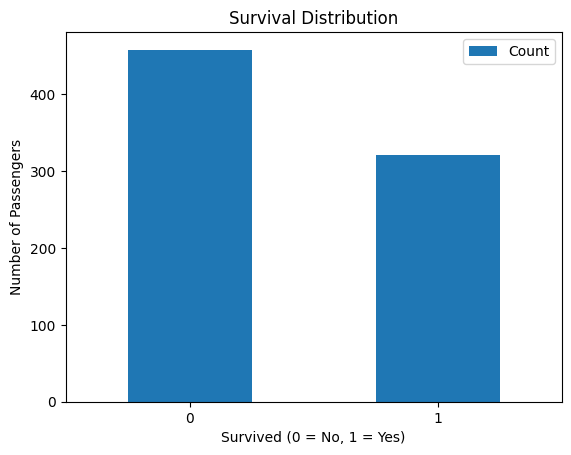

In [28]:
df['survived'].value_counts().plot(kind='bar', rot=0)
plt.title('Survival Distribution')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Number of Passengers')
plt.legend(['Count'])
plt.show()

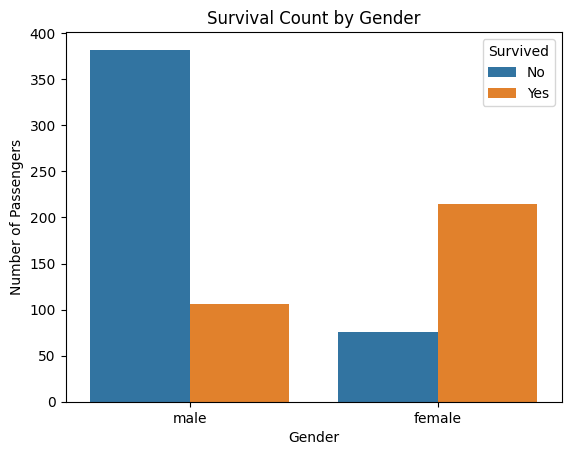

In [29]:
sns.countplot(data=df, x='sex', hue='survived')
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

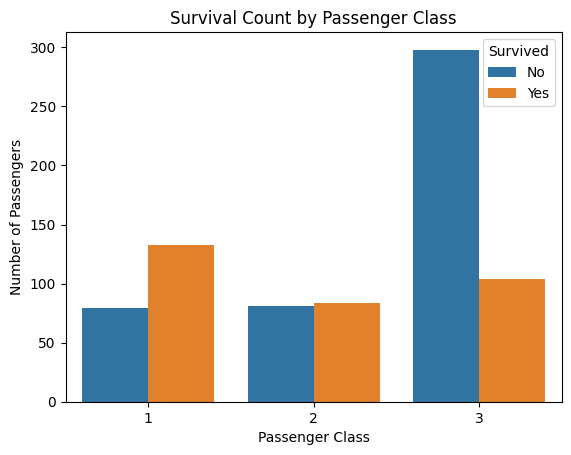

In [30]:
sns.countplot(data=df, x='pclass', hue='survived')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

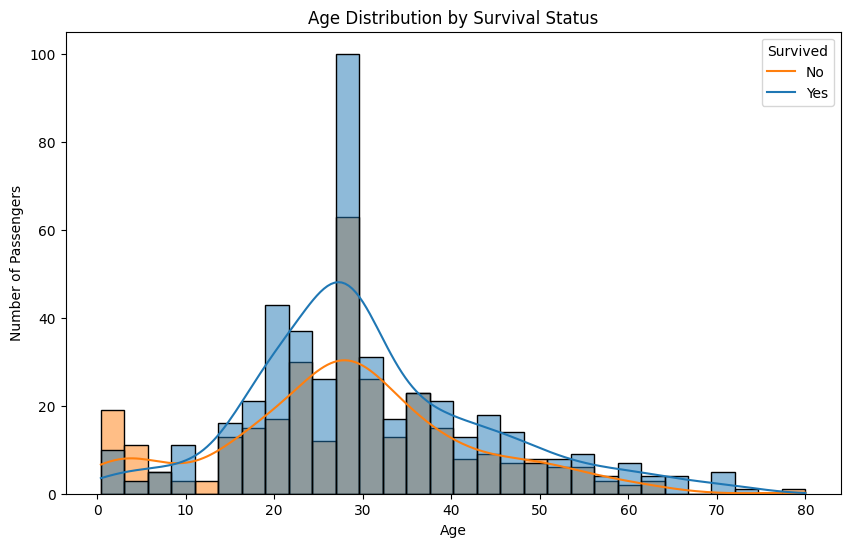

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='survived', kde=True, bins=30)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

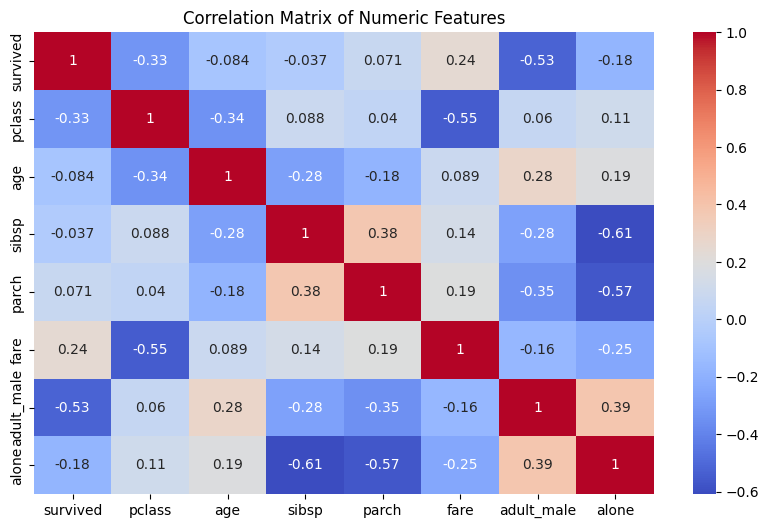

In [31]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

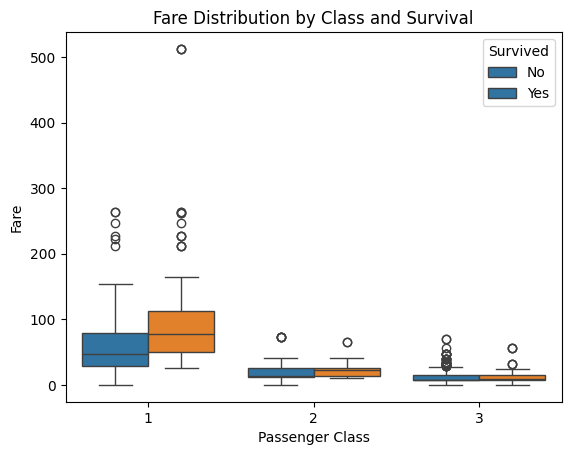

In [33]:
sns.boxplot(data=df, x='pclass', y='fare', hue='survived')
plt.title('Fare Distribution by Class and Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()